# Analysis of mutual information

**Author:** M.G. Baltussen

**Estimated running time:** 20 minutes

**Generated output:**
```
plots/mi_input.{svg,png} (manuscript figure 4)
plots/mi_C6_Ca_I1.{svg,png} (manuscript figure 4)
plots/mi_C7_Na_I3.{svg,png} (manuscript figure 4)
plots/mi_C9+H2O_Ca_2p_I2.{svg,png} (manuscript figure 4)
plots/mi_C4_Ca_I1.{svg,png} (manuscript figure 4)
plots/mi_results.{svg,png} (manuscript figure 4)

plots_extended/si_mutual_information.{svg,png}
```

In [1]:
""" System imports """
import pathlib
import toml

""" Essential imports"""
import numpy as np
import pandas as pd

""" ML/RC imports """
from sklearn.feature_selection import mutual_info_regression as mi_reg
from sklearn import linear_model, model_selection, preprocessing, svm
from sklearn import metrics

from pyrcn.echo_state_network import ESNClassifier


""" Visualization imports and settings"""
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

import seaborn as sns; sns.set_theme(style='ticks', context='paper', font_scale=0.7, 
rc={
    "axes.linewidth": 0.5,     
    'axes.facecolor':'#eceff4', 
    'axes.edgecolor':'#2e3440',
    'axes.labelcolor':'#2e3440',
    'text.color': '#2e3440',
    'xtick.color': '#2e3440',
    'ytick.color': '#2e3440',
    'font.family': 'Arial',
    'svg.fonttype': 'none',
    })
import colorcet as cc

nord_palette = [
    "#bf616a","#d08770","#ebcb8b","#a3be8c","#b48ead",
    "#8fbcbb","#88c0d0","#81a1c1","#5e81ac",
    "#2e3440","#3b4252","#434c5e","#4c566a",
    "#d8dee9","#e5e9f0","#eceff4",
]

sns.set_palette(nord_palette)

def save_plot(name, **kwargs):
    """Helper function to save figures in desired formats and location"""
    plt.savefig(f"../plots/{name}.svg", **kwargs)
    plt.savefig(f"../plots/{name}.png", dpi=600, **kwargs)

def save_si(name, **kwargs):
    """Helper function to save figures in desired formats and location"""
    plt.savefig(f"../plots_extended/{name}.svg", **kwargs)
    plt.savefig(f"../plots_extended/{name}.png", dpi=600, **kwargs)


In [2]:
df_lorenz = pd.read_csv("../data/lorenz.csv", index_col=0)
U_lorenz = df_lorenz[['DHA', 'NaOH', 'formaldehyde']]
X_lorenz = df_lorenz.drop(columns=['DHA', 'NaOH', 'CaCl2', 'formaldehyde'])

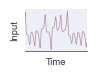

In [3]:
fig, axes = plt.subplots(figsize=(0.85, 0.65), constrained_layout=True)

axes.plot(U_lorenz.index[:360], U_lorenz.values[:360,0], alpha=1.0, lw=0.5, color='#b48ead')

axes.set_xticks([0, 1800, 3600, 7200, 10800], [0, 0.5, 1, 2, 3])
axes.set_xticks([])
axes.set_xlim(0, 3600)
axes.set_yticks([50, 30, 10], ['DHA', r'$\rm{CaCl}_2$', 'Form.'])
axes.set_yticks([])
axes.set_xlabel("Time")
axes.set_ylabel("Input")

sns.despine(left=True)
save_plot("mi_input")
plt.show()

In [4]:
label_map = pd.read_csv("../data/compound_label_map.csv",names=["compound","composition"])

label_dict = dict(zip(label_map["compound"],label_map["composition"]))
X_lorenz_named = X_lorenz.rename(columns=label_dict)

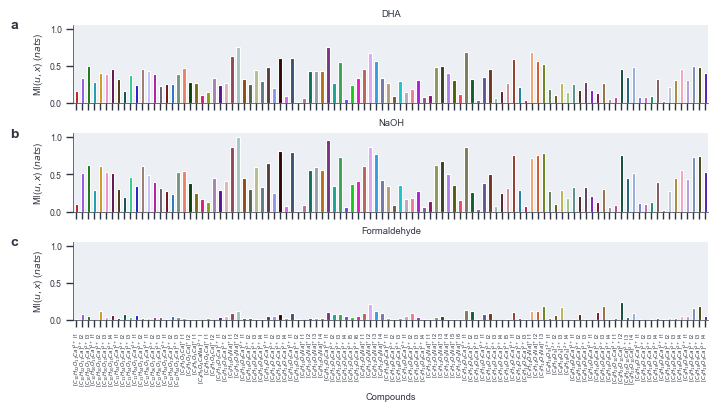

In [5]:
df_mi_lorenz_dha = pd.DataFrame([
    mi_reg(X_lorenz_named.values, U_lorenz['DHA'], n_neighbors=3)
], columns=X_lorenz_named.columns)
df_mi_lorenz_naoh = pd.DataFrame([
    mi_reg(X_lorenz_named.values, U_lorenz['NaOH'], n_neighbors=3)
], columns=X_lorenz_named.columns)
df_mi_lorenz_form = pd.DataFrame([
    mi_reg(X_lorenz_named.values, U_lorenz['formaldehyde'], n_neighbors=3)
], columns=X_lorenz_named.columns)

fig, axes = plt.subplots(3,1,figsize=(7.087,4.0), constrained_layout=True, 
    sharex=True, 
    sharey=True
)
sns.barplot(ax=axes[0], data=df_mi_lorenz_dha, orient='v', palette=cc.glasbey_dark[:df_mi_lorenz_dha.shape[1]], width=0.6)
sns.barplot(ax=axes[1], data=df_mi_lorenz_naoh, orient='v', palette=cc.glasbey_dark[:df_mi_lorenz_dha.shape[1]], width=0.6)
sns.barplot(ax=axes[2], data=df_mi_lorenz_form, orient='v', palette=cc.glasbey_dark[:df_mi_lorenz_dha.shape[1]], width=0.6)
plt.xticks(rotation='vertical', fontsize=4, ha='center')
sns.despine()
axes[0].set_title("DHA")
axes[1].set_title("NaOH")
axes[2].set_title("Formaldehyde")
axes[0].set_ylabel(r"MI($u,x$) ($nats$)")
axes[1].set_ylabel(r"MI($u,x$) ($nats$)")
axes[2].set_ylabel(r"MI($u,x$) ($nats$)")
axes[2].set_xlabel(r"Compounds")

axes[0].text(-0.1, 0.95, "a", transform=axes[0].transAxes, size=10, weight="bold")
axes[1].text(-0.1, 0.95, "b", transform=axes[1].transAxes, size=10, weight="bold")
axes[2].text(-0.1, 0.95, "c", transform=axes[2].transAxes, size=10, weight="bold")


save_si('si_mutual_information')
plt.show()

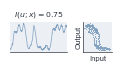

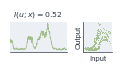

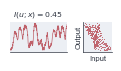

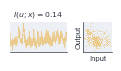

In [6]:
MI_pd = pd.DataFrame([mi_reg(X_lorenz.values, U_lorenz['DHA'])], columns=X_lorenz.columns)

fig, axes = plt.subplots(1,2, figsize=(1.1, 0.6), constrained_layout=True, gridspec_kw={'width_ratios': [2,1]})

axes[0].plot(U_lorenz.index[:360], X_lorenz[['C6_Ca_I1']][:360], alpha=1.0, lw=0.5, c='C7')
axes[0].set_xticks([])
axes[0].set_xlim(0, 3600)
axes[0].set_yticks([])
axes[1].scatter(U_lorenz.values[:360,0], X_lorenz[['C6_Ca_I1']][:360], alpha=1.0, lw=0, s=0.4, color='C7')  
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel("Input", fontsize='small') 
axes[1].set_ylabel("Output", fontsize='small')
axes[1].yaxis.set_label_coords(-0.05, 0.5)
axes[1].xaxis.set_label_coords(0.5, -0.1)

axes[0].text(0.5, 1.2, s=r"$I(u;x)={:.2}$".format(MI_pd[['C6_Ca_I1']].values[0][0]), 
                ha='center', transform=axes[0].transAxes, fontsize='small' )
sns.despine(ax=axes[0], left=True)
sns.despine(ax=axes[1])    
save_plot('mi_C6_Ca_I1')


fig, axes = plt.subplots(1,2, figsize=(1.1, 0.6), constrained_layout=True, gridspec_kw={'width_ratios': [2,1]})

axes[0].plot(U_lorenz.index[:360], X_lorenz[['C7_Na_I3']][:360], alpha=1.0, lw=0.5, c='C3')
axes[0].set_xticks([])
axes[0].set_xlim(0, 3600)
axes[0].set_yticks([])
axes[1].scatter(U_lorenz.values[:360,0], X_lorenz[['C7_Na_I3']][:360], alpha=1.0, lw=0, s=0.4, color='C3')  
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel("Input", fontsize='small') 
axes[1].set_ylabel("Output", fontsize='small')
axes[1].yaxis.set_label_coords(-0.05, 0.5)
axes[1].xaxis.set_label_coords(0.5, -0.1)

axes[0].text(0.5, 1.2, s=r"$I(u;x)={:.2}$".format(MI_pd[['C7_Na_I3']].values[0][0]), 
                ha='center', transform=axes[0].transAxes, fontsize='small' )
sns.despine(ax=axes[0], left=True)
sns.despine(ax=axes[1])
save_plot('mi_C7_Na_I3')

fig, axes = plt.subplots(1,2, figsize=(1.1, 0.6), constrained_layout=True, gridspec_kw={'width_ratios': [2,1]})

axes[0].plot(U_lorenz.index[:360], X_lorenz[['C9+H2O_Ca_2p_I2']][:360], alpha=1.0, lw=0.5, c='C0')
axes[0].set_xticks([])
axes[0].set_xlim(0, 3600)
axes[0].set_yticks([])
axes[1].scatter(U_lorenz.values[:360,0], X_lorenz[['C9+H2O_Ca_2p_I2']][:360], alpha=1.0, lw=0, s=0.4, color='C0')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel("Input", fontsize='small') 
axes[1].set_ylabel("Output", fontsize='small')
axes[1].yaxis.set_label_coords(-0.05, 0.5)
axes[1].xaxis.set_label_coords(0.5, -0.1)
axes[0].text(0.5, 1.2, s=r"$I(u;x)={:.2}$".format(MI_pd[['C9+H2O_Ca_2p_I2']].values[0][0]), 
                ha='center', transform=axes[0].transAxes, fontsize='small' )
sns.despine(ax=axes[0], left=True)
sns.despine(ax=axes[1])    
save_plot('mi_C9+H2O_Ca_2p_I2')

fig, axes = plt.subplots(1,2, figsize=(1.1, 0.6), constrained_layout=True, gridspec_kw={'width_ratios': [2,1]})

axes[0].plot(U_lorenz.index[:360], X_lorenz[['C4_Ca_I1']][:360], alpha=1.0, lw=0.5, c='C2')
axes[0].set_xticks([])
axes[0].set_xlim(0, 3600)
axes[0].set_yticks([])
axes[1].scatter(U_lorenz.values[:360,0], X_lorenz[['C4_Ca_I1']][:360], alpha=1.0, lw=0, s=0.4, color='C2')  
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel("Input", fontsize='small') 
axes[1].set_ylabel("Output", fontsize='small')
axes[1].yaxis.set_label_coords(-0.05, 0.5)
axes[1].xaxis.set_label_coords(0.5, -0.1)
axes[0].text(0.5, 1.2, s=r"$I(u;x)={:.2}$".format(MI_pd[['C4_Ca_I1']].values[0][0]), 
                ha='center', transform=axes[0].transAxes, fontsize='small' )

sns.despine(ax=axes[0], left=True)
sns.despine(ax=axes[1])
save_plot('mi_C4_Ca_I1')


In [7]:

df_dmi_lorenz_dha = []
df_dmi_lorenz_NaOH = []
df_dmi_lorenz_form = []

dt_range = range(-540, 540, 10)

for dt in dt_range:
    X_lorenz_shift = X_lorenz.assign(time = X_lorenz.index + dt).query('time > 0').set_index('time', drop=True)
    X_lorenz_shift = X_lorenz_shift.loc[X_lorenz_shift.index.intersection(U_lorenz.index)].fillna(0)
    U_lorenz_select = U_lorenz.loc[X_lorenz_shift.index]

    df_mi2_DHA = pd.DataFrame([
        mi_reg(X_lorenz_shift.values, U_lorenz_select["DHA"], n_neighbors=3)
    ], columns=X_lorenz_shift.columns)
    df_mi2_NaOH = pd.DataFrame([
        mi_reg(X_lorenz_shift.values, U_lorenz_select['NaOH'], n_neighbors=3)
    ], columns=X_lorenz_shift.columns)
    df_mi2_form = pd.DataFrame([
        mi_reg(X_lorenz_shift.values, U_lorenz_select['formaldehyde'], n_neighbors=3)
    ], columns=X_lorenz_shift.columns)

    df_dmi_lorenz_dha.append((df_mi2_DHA).values[0])
    df_dmi_lorenz_NaOH.append((df_mi2_NaOH).values[0])
    df_dmi_lorenz_form.append((df_mi2_form).values[0])

df_dmi_lorenz_dha = pd.DataFrame(df_dmi_lorenz_dha, columns=X_lorenz_shift.columns, index= dt_range)
df_dmi_lorenz_NaOH = pd.DataFrame(df_dmi_lorenz_NaOH, columns=X_lorenz_shift.columns, index= dt_range)
df_dmi_lorenz_form = pd.DataFrame(df_dmi_lorenz_form, columns=X_lorenz_shift.columns, index= dt_range)


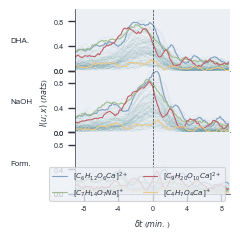

In [10]:
import seaborn as sns; sns.set_theme(style='ticks', context='paper', font_scale=0.6, 
rc={
    "axes.linewidth": 0.5,     
    'axes.facecolor':'#eceff4', 
    'axes.edgecolor':'#2e3440',
    'axes.labelcolor':'#2e3440',
    'text.color': '#2e3440',
    'xtick.color': '#2e3440',
    'ytick.color': '#2e3440',
    'font.family': 'Arial',
    'svg.fonttype': 'none',
    })
sns.set_palette(nord_palette)

with sns.color_palette("crest", n_colors=16):

    fig, axes = plt.subplots(3, 1, figsize=(2.0,2.4), 
    sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0.0)

    axes[0].plot(dt_range, df_dmi_lorenz_dha.values[:, ~(df_dmi_lorenz_dha.values < 0.1).all(axis=0)], alpha=0.3, lw=0.1)
    axes[1].plot(dt_range, df_dmi_lorenz_NaOH.values[:, ~(df_dmi_lorenz_NaOH.values < 0.1).all(axis=0)], alpha=0.3, lw=0.1)
    axes[2].plot(dt_range, df_dmi_lorenz_form.values[:, ~(df_dmi_lorenz_form.values < 0.1).all(axis=0)], alpha=0.3, lw=0.1)

    axes[0].plot(dt_range, df_dmi_lorenz_dha[["C6_Ca_I1"]].values, c='C7', label='C6_Ca_I1', lw=0.8)
    axes[0].plot(dt_range, df_dmi_lorenz_dha[["C7_Na_I3"]].values, c='C3', label='C7_Na_I3', lw=0.8)
    axes[0].plot(dt_range, df_dmi_lorenz_dha[["C9+H2O_Ca_2p_I2"]].values, c='C0', label='C9+H2O_Ca_2p_I2', lw=0.8)
    axes[0].plot(dt_range, df_dmi_lorenz_dha[["C4_Ca_I1"]].values, c='C2', label='C4_Ca_I1', lw=0.8)

    axes[1].plot(dt_range, df_dmi_lorenz_NaOH[["C6_Ca_I1"]].values, c='C7', label='"C6_Ca_I1"', lw=0.8)
    axes[1].plot(dt_range, df_dmi_lorenz_NaOH[["C7_Na_I3"]].values, c='C3', label='"C7_Na_I3"', lw=0.8)
    axes[1].plot(dt_range, df_dmi_lorenz_NaOH[["C9+H2O_Ca_2p_I2"]].values, c='C0', label='"C9+H2O_Ca_2p_I2"', lw=0.8)
    axes[1].plot(dt_range, df_dmi_lorenz_NaOH[["C4_Ca_I1"]].values, c='C2', label='"C4_Ca_I1"', lw=0.8)

    axes[2].plot(dt_range, df_dmi_lorenz_form[['C6_Ca_I1']].values, c='C7', label=r'$[C_{6}H_{12}O_{6}Ca]^{2+}$', lw=0.8)
    axes[2].plot(dt_range, df_dmi_lorenz_form[['C7_Na_I3']].values, c='C3', label=r'$[C_{7}H_{14}O_{7}Na]^{+}$', lw=0.8)
    axes[2].plot(dt_range, df_dmi_lorenz_form[['C9+H2O_Ca_2p_I2']].values, c='C0', label=r'$[C_{9}H_{20}O_{10}Ca]^{2+}$', lw=0.8)
    axes[2].plot(dt_range, df_dmi_lorenz_form[['C4_Ca_I1']].values, c='C2', label=r'$[C_{4}H_{7}O_{4}Ca]^{+}$', lw=0.8)

axes[2].set_ylim(0, 1.0)
axes[2].set_xlabel(r"$\delta t$ ($min.$)")
axes[1].set_ylabel(r"$I(u;x)$ ($nats$)")

axes[0].text(-0.42, 0.5, "DHA.", transform=axes[0].transAxes, va='center')
axes[1].text(-0.42, 0.5, "NaOH", transform=axes[1].transAxes, va='center')
axes[2].text(-0.42, 0.5, "Form.", transform=axes[2].transAxes, va='center')

axes[1].yaxis.set_label_coords(-0.16, 0.5)

axes[2].legend(ncol=2, loc='upper center', bbox_to_anchor=(0.4, 0.5))
axes[2].set_xlim(-540, 540)
axes[2].set_xticks([-480, -240, 0, 240, 480], [-8, -4, 0, 4, 8])
axes[0].set_yticks([0,0, 0.4, 0.8,])
axes[0].axvline(0, color='C9', lw=0.5, ls='dashed')
axes[1].axvline(0, color='C9', lw=0.5, ls='dashed')
axes[2].axvline(0, color='C9', lw=0.5, ls='dashed')
sns.despine() 
save_plot("mi_results")
plt.show()